# 첫 번째 가설
### "특정 장르에 대해 관객의 선호도가 높을 것이다."
+ 장르별 평점 및 좋아요 추이 차이가 나타날 것이다

In [73]:
import pandas as pd

data = pd.read_csv("INDIA/preprocessed_SeriesOn.csv", encoding = 'utf-8-sig')


data.head()

,title,year,version,type,director,actor,age,runtime,rating,like,...,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert
0,'개그' 더 크라운,2021,Null,구매,아담 크라우스,"로렌 애슐리 카터,트레이시 페레즈",15세 관람가,89,6.33,0,...,0,1,0,0,1,0,0,0,0,0
1,'데이빗 린치' 단편선,0,Null,구매,데이빗 린치,Null,19세 관람가,148,10.00,21,...,0,0,1,0,0,0,0,0,0,0
2,...ing,2003,Null,구매,이언희,"임수정,김래원,이미숙,최덕문,이성경,김지영,윤덕현,이유정",12세 관람가,103,8.89,9,...,0,0,0,1,0,0,0,0,0,0
3,...ing,2003,Null,대여,이언희,"임수정,김래원,이미숙,최덕문,이성경,김지영,윤덕현,이유정",12세 관람가,103,8.89,4,...,0,0,0,1,0,0,0,0,0,0
4,0,0,Null,구매,이보리,"박현수,이보리,전혜원,이민지,공예림",15세 관람가,18,10.00,1,...,0,0,1,0,0,0,0,0,0,0


In [74]:
# 데이터프레임의 정보 확인
print(data.info())

# 기초 통계량 확인
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29185 entries, 0 to 29184
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         29185 non-null  object 
 1   year          29185 non-null  int64  
 2   version       29185 non-null  object 
 3   type          29185 non-null  object 
 4   director      29185 non-null  object 
 5   actor         29185 non-null  object 
 6   age           29185 non-null  object 
 7   runtime       29185 non-null  int64  
 8   rating        29185 non-null  float64
 9   like          29185 non-null  int64  
 10  comment       29185 non-null  int64  
 11  isDRM         29185 non-null  object 
 12  cost          29185 non-null  int64  
 13  period        29185 non-null  object 
 14  is_action     29185 non-null  int64  
 15  is_comedy     29185 non-null  int64  
 16  is_drama      29185 non-null  int64  
 17  is_melo       29185 non-null  int64  
 18  is_horror     29185 non-nu

In [84]:
# 장르 열만 포함한 데이터프레임 생성
genre_columns = ['is_action', 'is_comedy', 'is_drama', 'is_melo', 'is_horror', 'is_fantasy', 'is_animation', 'is_DQ', 'is_indie', 'is_concert']
genre_data = data[['rating', 'like'] + genre_columns]

# 장르별 데이터프레임 생성
def melt_genre_data(df, genre_columns):
    melted_data = []
    for genre in genre_columns:
        genre_df = df[df[genre] == 1].copy()
        genre_df['genre'] = genre
        melted_data.append(genre_df)
    return pd.concat(melted_data)

melted_genre_data = melt_genre_data(genre_data, genre_columns)
melted_genre_data

,rating,like,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert,genre
8,7.73,25,1,0,0,0,0,0,0,0,0,0,is_action
12,7.31,1,1,0,1,0,0,0,0,0,0,0,is_action
15,3.58,3,1,0,0,0,0,0,0,0,0,0,is_action
16,3.58,0,1,0,0,0,0,0,0,0,0,0,is_action
20,5.41,3,1,0,0,0,0,0,0,0,0,0,is_action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24591,7.75,1,0,0,0,0,0,0,0,0,0,1,is_concert
25539,8.29,23,0,0,0,0,0,0,0,0,0,1,is_concert
25540,8.29,15,0,0,0,0,0,0,0,0,0,1,is_concert
28408,6.67,1,0,0,0,0,0,0,0,0,0,1,is_concert


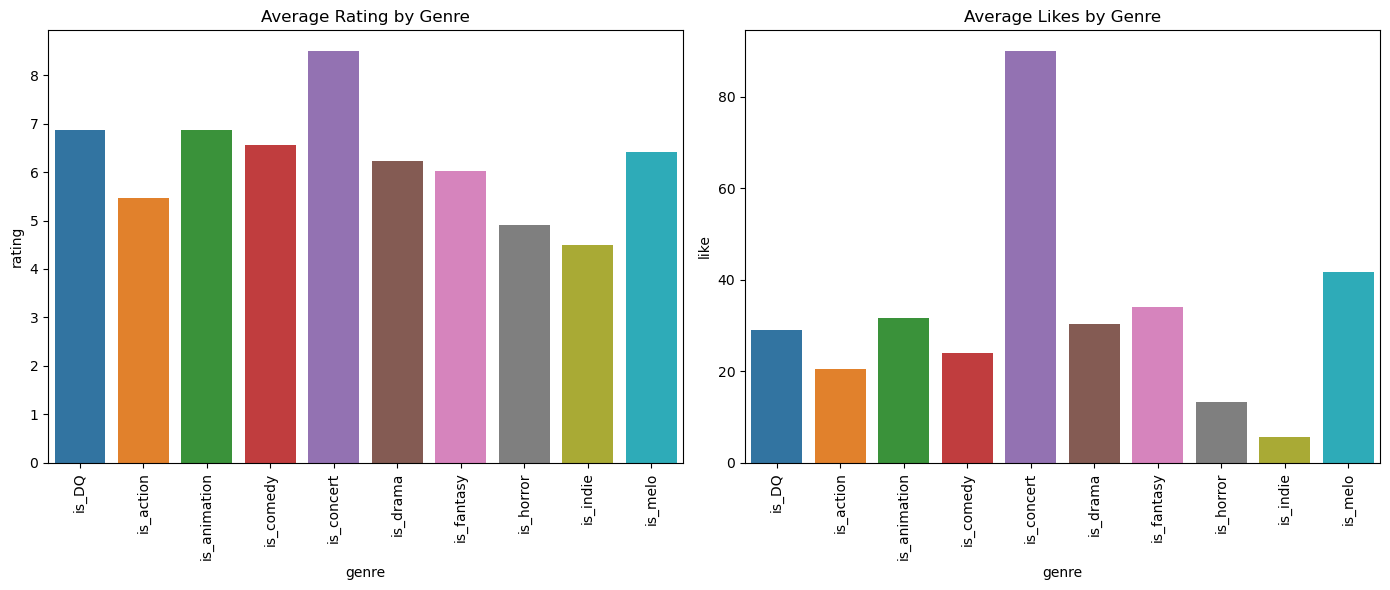

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# 장르별 평균 평점과 평균 좋아요 수 계산
genre_stats = melted_genre_data.groupby('genre').agg({'rating': 'mean', 'like': 'mean'}).reset_index()

# 평균 평점과 평균 좋아요 수 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=genre_stats, x='genre', y='rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(data=genre_stats, x='genre', y='like')
plt.title('Average Likes by Genre')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [77]:
# 결과 확인
print(genre_stats)

          genre    rating       like
0         is_DQ  6.863956  29.051982
1     is_action  5.459343  20.389697
2  is_animation  6.858607  31.646208
3     is_comedy  6.554015  24.009884
4    is_concert  8.501017  90.016949
5      is_drama  6.231976  30.357501
6    is_fantasy  6.028403  33.940330
7     is_horror  4.915627  13.353103
8      is_indie  4.490196   5.705882
9       is_melo  6.413639  41.633086


          genre  count
0     is_action  10249
1     is_comedy   5362
2      is_drama  12565
3       is_melo   3633
4     is_horror   5463
5    is_fantasy   3268
6  is_animation   2835
7         is_DQ   1135
8      is_indie     51
9    is_concert     59


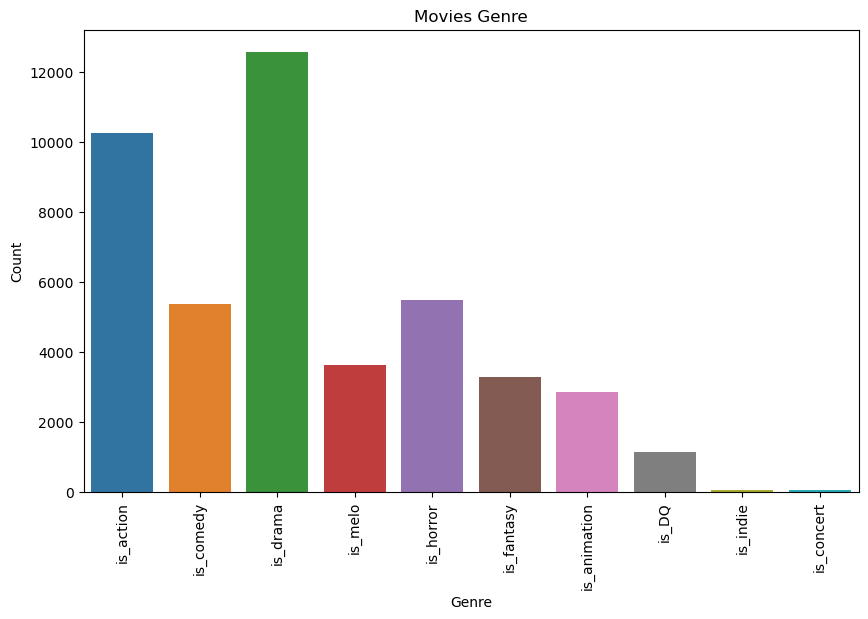

In [78]:
# 각 장르별 작품 수 계산
genre_counts = data[genre_columns].sum().reset_index()
genre_counts.columns = ['genre', 'count']

# 결과 출력
print(genre_counts)

# 장르별 작품 수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts, x='genre', y='count')
plt.title('Movies Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [79]:
# 장르별 평균 좋아요 수 계산
genre_like_stats = melted_genre_data.groupby('genre')['like'].describe()
genre_like_stats

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
is_DQ,1135.0,29.051982,80.285052,0.0,2.0,7.0,21.0,1547.0
is_action,10249.0,20.389697,77.984798,0.0,0.0,2.0,12.0,2422.0
is_animation,2835.0,31.646208,138.960794,0.0,2.0,7.0,23.0,5666.0
is_comedy,5362.0,24.009884,74.321517,0.0,1.0,5.0,17.0,1383.0
is_concert,59.0,90.016949,226.156681,0.0,3.0,14.0,82.0,1547.0
is_drama,12565.0,30.357501,99.653516,0.0,1.0,5.0,21.0,5666.0
is_fantasy,3268.0,33.940330,100.365816,0.0,1.0,6.0,25.0,1950.0
is_horror,5463.0,13.353103,53.481337,0.0,0.0,2.0,7.0,1458.0
is_indie,51.0,5.705882,6.057373,0.0,1.0,5.0,8.0,30.0


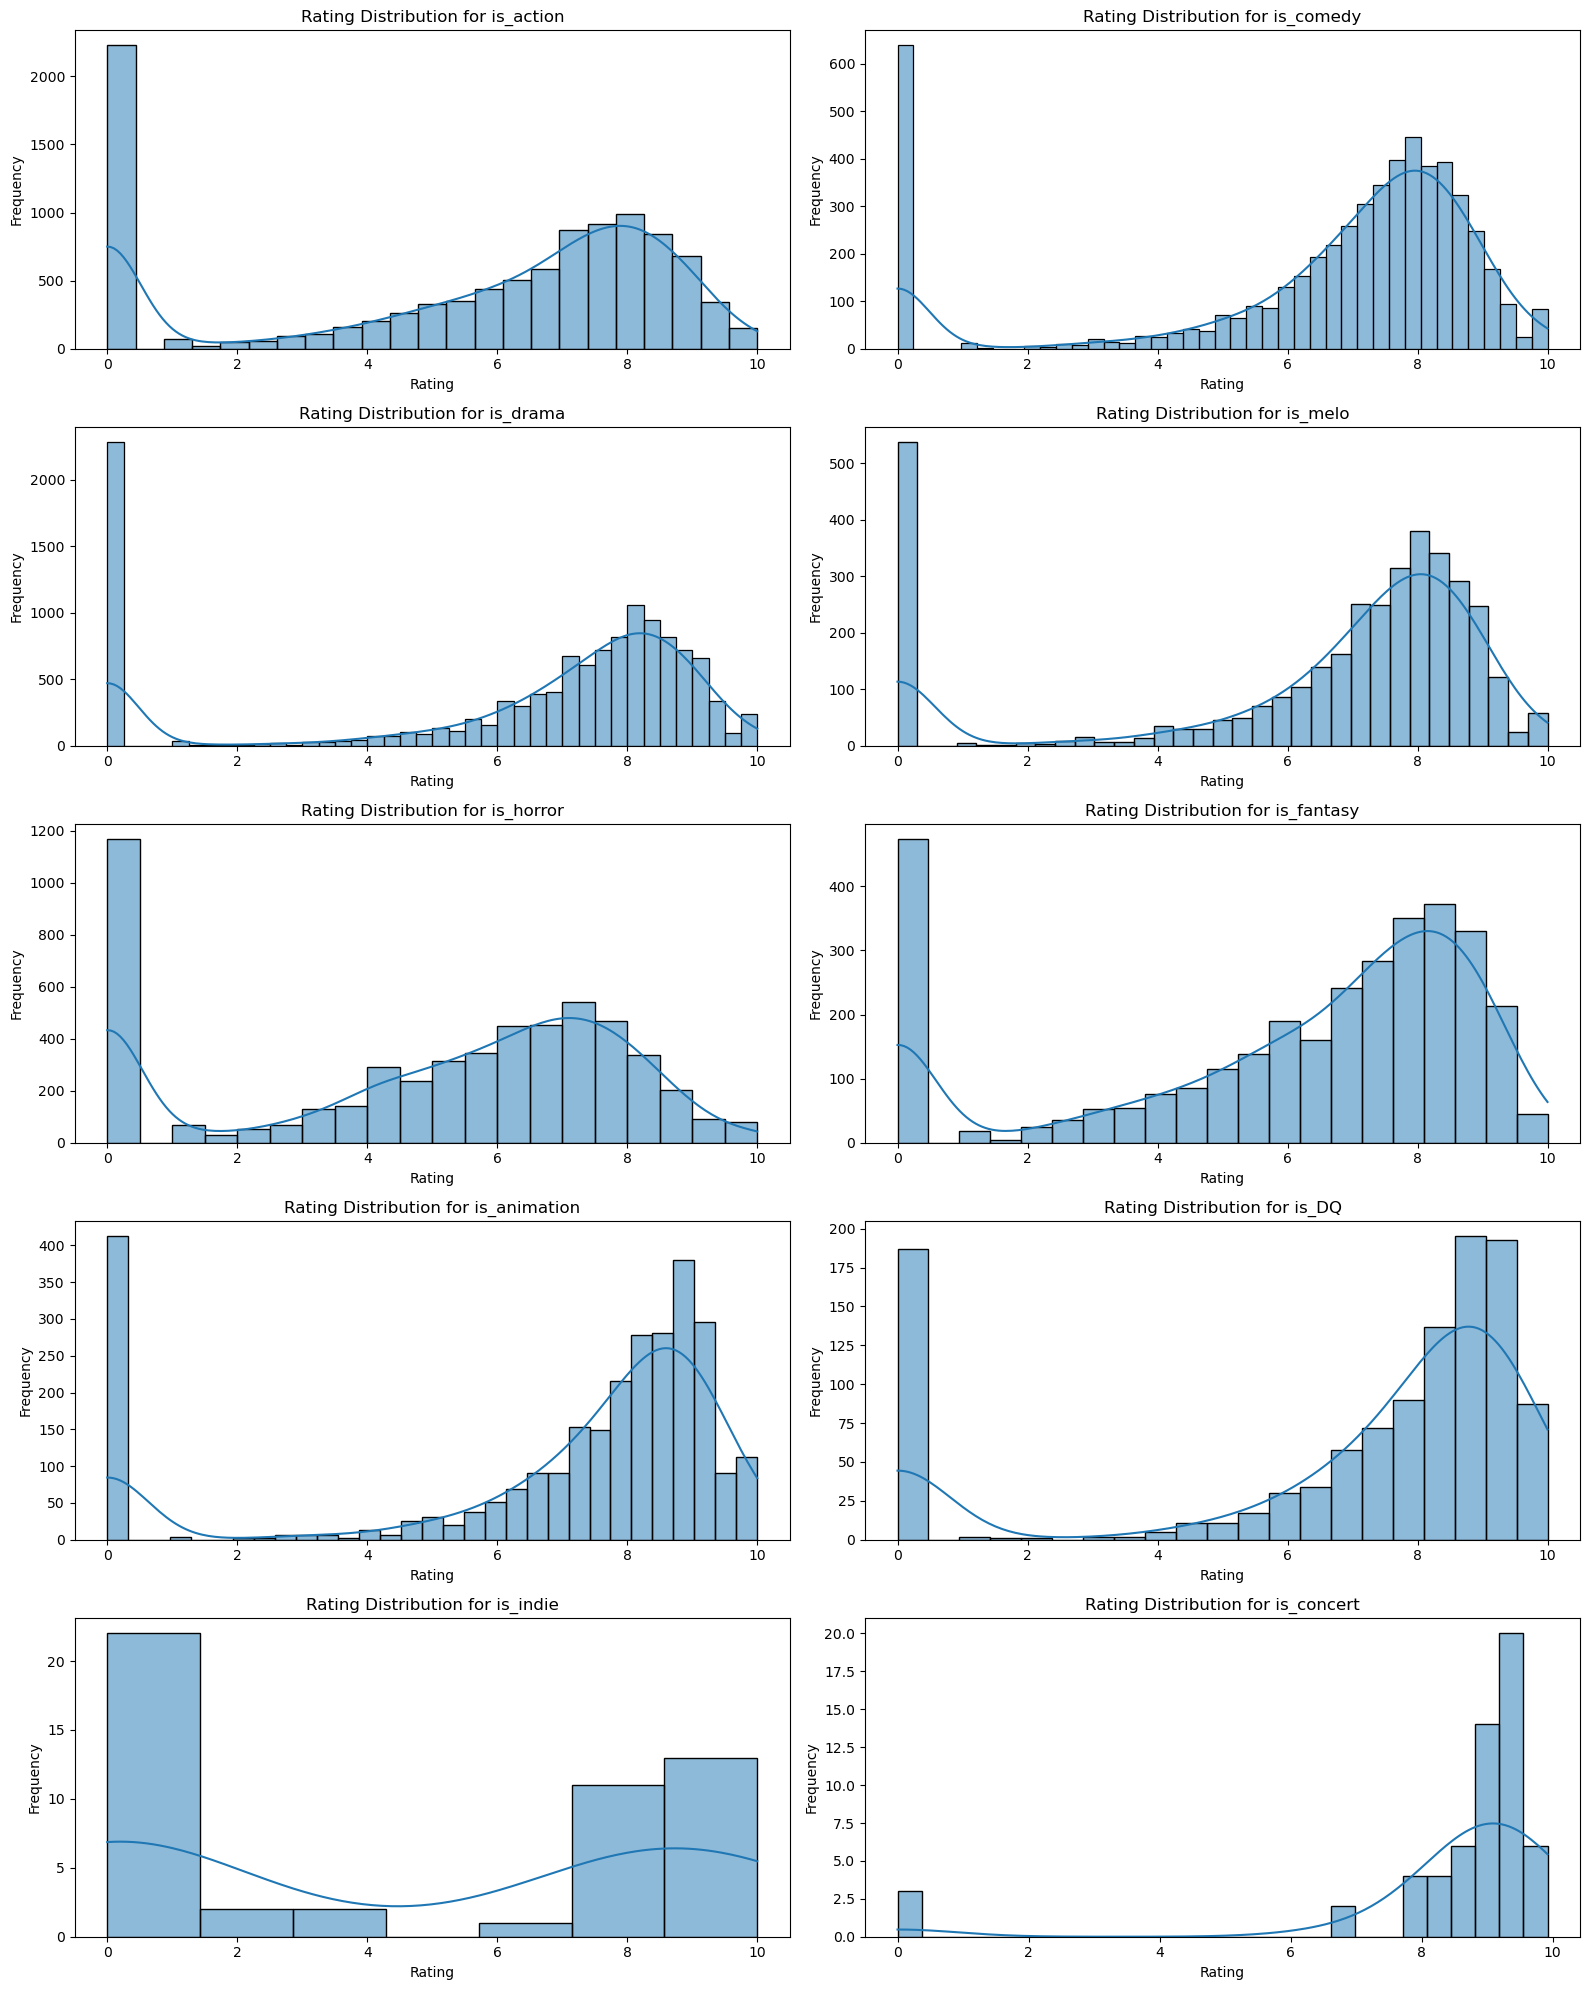

In [80]:
plt.figure(figsize=(16, 20))

# 장르별로 데이터프레임 생성
for i, genre in enumerate(genre_columns):
    plt.subplot(5, 2, i+1)
    genre_data = melted_genre_data[melted_genre_data['genre'] == genre]
    sns.histplot(genre_data['rating'], kde=True)
    plt.title(f'Rating Distribution for {genre}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

          genre  count
0     is_action    137
1     is_comedy     95
2      is_drama    192
3       is_melo     80
4     is_horror     87
5    is_fantasy     83
6  is_animation     75
7         is_DQ     68
8      is_indie     51
9    is_concert     52


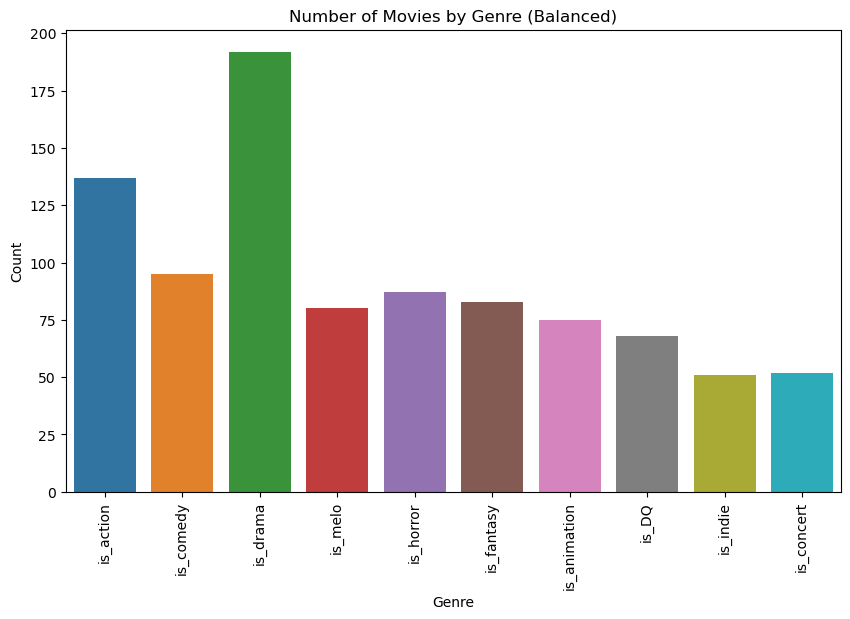

In [81]:
# 균형을 맞추기 위한 목표 작품 수 설정 (최소 작품 수 기준)
min_count = genre_counts['count'].min()

# 장르별로 균형을 맞추기 위해 표본 추출
balanced_data = pd.DataFrame()
for genre in genre_columns:
    genre_data = data[data[genre] == 1]
    if genre_data.shape[0] > min_count:
        genre_data = genre_data.sample(min_count, random_state=42)
    balanced_data = pd.concat([balanced_data, genre_data])

# 결과 확인
balanced_genre_counts = balanced_data[genre_columns].sum().reset_index()
balanced_genre_counts.columns = ['genre', 'count']
print(balanced_genre_counts)

# 장르별 작품 수 시각화 (균형 맞춘 후)
plt.figure(figsize=(10, 6))
sns.barplot(data=balanced_genre_counts, x='genre', y='count')
plt.title('Number of Movies by Genre (Balanced)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [83]:
balanced_data.head()

,title,year,version,type,director,actor,age,runtime,rating,like,...,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert
27146,퓨리어스,2019,Null,대여,드자닉 파이지예브,"알렉세이 세레브리아코프,율리야 클리니나,일리야 말라코프",12세 관람가,117,5.91,0,...,1,0,0,0,0,0,0,0,0,0
29101,히든,1988,Null,구매,잭 숄더,"카일 맥라클란,마이클 누리,클라우디아 크리스찬,클라렌스 펠더,크루 굴레이저,에드 오로스",15세 관람가,97,8.69,7,...,1,0,0,0,1,1,0,0,0,0
21831,자칼,1997,Null,대여,마이클 카튼-존스,"브루스 윌리스,리차드 기어,시드니 포이티어,다이안 베노라,테스 하퍼",15세 관람가,124,7.51,10,...,1,0,0,0,0,0,0,0,0,0
9607,목포는 항구다,2004,Null,구매,김지훈,"조재현,차인표,송선미,손병호,박철민,김일우,최덕문,정상훈,김황도,윤이준",15세 관람가,110,6.90,1,...,1,1,0,0,0,0,0,0,0,0
4293,노벨스 라스트 윌,2012,Null,구매,피터 플린스,"말린 크레핀,본 켈먼,레이프 안드리,에릭 요한슨,안체 트라우",15세 관람가,92,5.64,1,...,1,0,0,0,0,0,0,0,0,0


In [70]:
# 장르별 평균 평점 및 좋아요 수 계산
balanced_genre_avg = balanced_data[genre_columns + ['rating', 'like']].melt(id_vars=['rating', 'like'], var_name='genre', value_name='is_present')
balanced_genre_avg = balanced_genre_avg[balanced_genre_avg['is_present'] == 1]

# 장르별 평균 평점 및 좋아요 수 계산
genre_avg_rating = balanced_genre_avg.groupby('genre')['rating'].mean().reset_index()
genre_avg_likes = balanced_genre_avg.groupby('genre')['like'].mean().reset_index()

# 결과 병합
genre_avg_combined = genre_avg_rating.merge(genre_avg_likes, on='genre')
genre_avg_combined.columns = ['genre', 'average_rating', 'average_like']

# 결과 확인
print(genre_avg_combined)

          genre  average_rating  average_like
0         is_DQ        7.068676     56.573529
1     is_action        6.601679     56.890511
2  is_animation        6.990800     45.600000
3     is_comedy        6.932947     31.789474
4    is_concert        8.477115     81.115385
5      is_drama        6.500938     40.692708
6    is_fantasy        6.667349     53.156627
7     is_horror        5.583103     24.494253
8      is_indie        4.490196      5.705882
9       is_melo        6.738375     41.975000


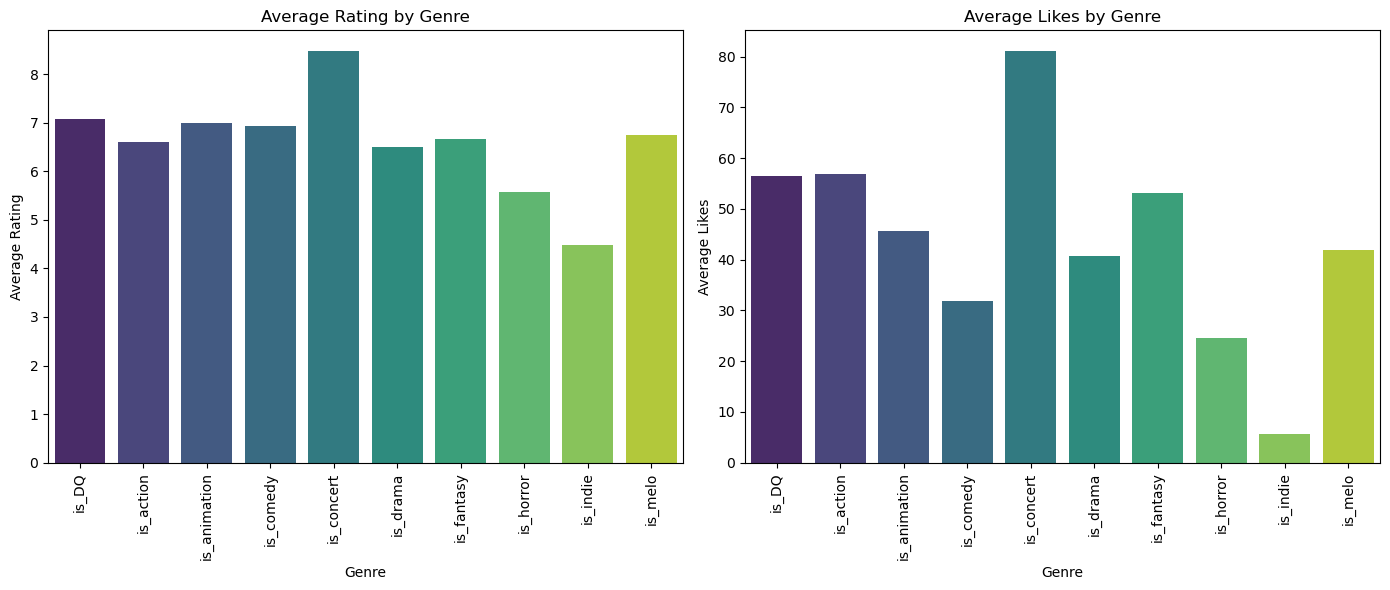

In [71]:
# 결과 시각화
plt.figure(figsize=(14, 6))

# 평균 평점 그래프
plt.subplot(1, 2, 1)
sns.barplot(data=genre_avg_combined, x='genre', y='average_rating', palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)

# 평균 좋아요 수 그래프
plt.subplot(1, 2, 2)
sns.barplot(data=genre_avg_combined, x='genre', y='average_like', palette='viridis')
plt.title('Average Likes by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Likes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

# 각 장르별 평점 데이터 수집
ratings_by_genre = [genre_avg[genre_avg['genre'] == genre]['rating'] for genre in genre_columns]

# ANOVA 분석
f_val, p_val = stats.f_oneway(*ratings_by_genre)

print(f"ANOVA F-value: {f_val}")
print(f"ANOVA p-value: {p_val}")

if p_val < 0.05:
    print("장르별 평점 차이는 통계적으로 유의미합니다.")
else:
    print("장르별 평점 차이는 통계적으로 유의미하지 않습니다.")

# 두 번째 가설

## 구매 vs 대여

### 15세, 19세 영화는 구매 비율이 대여 비율보다 높고, 전체 관람가 영화, 7세, 12세 관람가 영화는 구매 비율과 대여 비율이 비슷할 것이다.

In [123]:
import os

if os.name == "posix":
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

type
구매    19343
대여     9812
무료       30
Name: count, dtype: int64


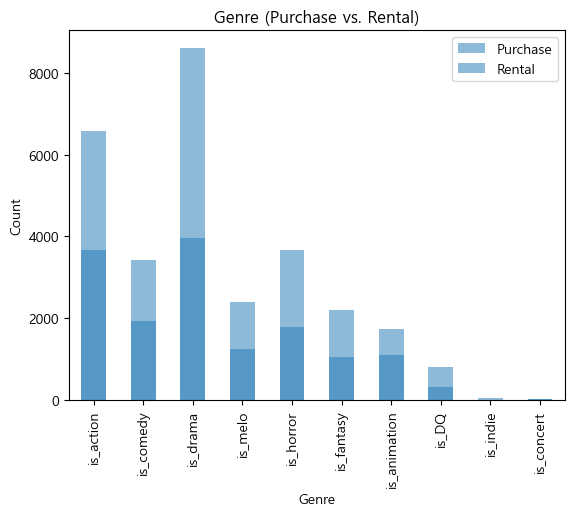

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("INDIA/preprocessed_SeriesOn.csv", encoding = 'utf-8-sig')


data.head()

# 폰트 
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'

# 유형별 데이터 분포 (구매 vs 대여)
type_distribution = data['type'].value_counts()
print(type_distribution) 

# 장르 선호도 분석
genre_columns = ['is_action', 'is_comedy', 'is_drama', 'is_melo', 'is_horror', 'is_fantasy', 'is_animation', 'is_DQ', 'is_indie', 'is_concert']

purchase_genres = data[data['type'] == '구매'][genre_columns].sum()
rental_genres = data[data['type'] == '대여'][genre_columns].sum()

purchase_genres.plot(kind='bar', alpha=0.5, label='Purchase')
rental_genres.plot(kind='bar', alpha=0.5, label='Rental')
plt.legend()
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre (Purchase vs. Rental)')
plt.show()



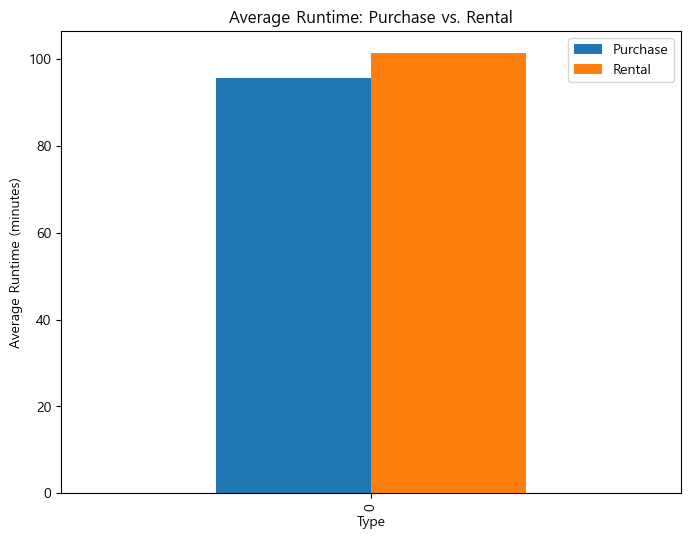

In [125]:
# 평균 상영 시간 분석
average_runtime_purchase = data[data['type'] == '구매']['runtime'].mean()
average_runtime_rental = data[data['type'] == '대여']['runtime'].mean()

average_runtime = pd.DataFrame({
    'Purchase': [average_runtime_purchase],
    'Rental': [average_runtime_rental]
})

average_runtime.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Type')
plt.ylabel('Average Runtime (minutes)')
plt.title('Average Runtime: Purchase vs. Rental')
plt.show()


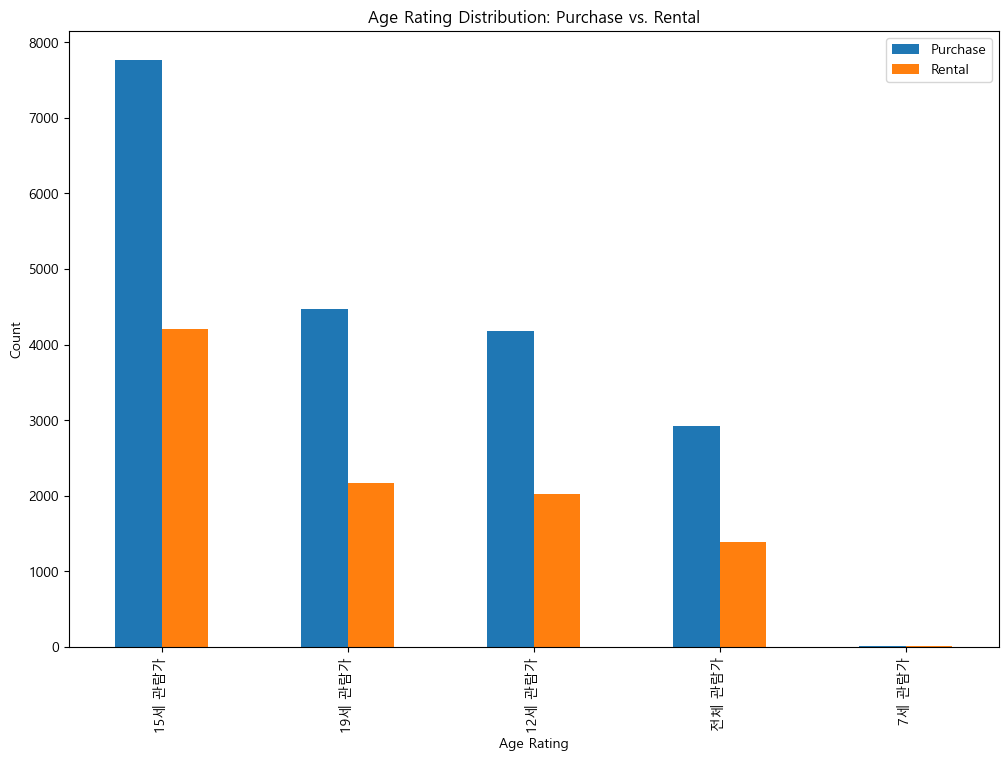

In [126]:
# 연령 등급 분포 분석
age_rating_purchase = data[data['type'] == '구매']['age'].value_counts()
age_rating_rental = data[data['type'] == '대여']['age'].value_counts()

age_rating = pd.DataFrame({
    'Purchase': age_rating_purchase,
    'Rental': age_rating_rental
}).fillna(0)

age_rating.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Age Rating')
plt.ylabel('Count')
plt.title('Age Rating Distribution: Purchase vs. Rental')
plt.show()

In [105]:
# 각 연령 등급별 영화 수 계산
age_rating_counts = data['age'].value_counts()

# 데이터 프레임으로 변환하여 표시
age_rating_counts_df = age_rating_counts.reset_index()
age_rating_counts_df.columns = ['Age Rating', 'Count']

age_rating_counts_df

,Age Rating,Count
0,15세 관람가,11974
1,19세 관람가,6647
2,12세 관람가,6210
3,전체 관람가,4326
4,7세 관람가,28


# 15세 관람가 영화:

구매 비율이 더 높음: 구매 비율이 대여 비율보다 높아, 이 연령대의 영화는 소유하고 싶어 하는 경향이 있음

# 19세 관람가 영화:

구매 비율이 더 높음: 성인용 영화의 경우, 일시적인 시청보다는 소유하여 여러 번 보고자 하는 경향 or 경제적 여유?

# 12세 관람가 영화:

구매 비율이 대여 비율보다 높음: 가족 또는 어린이용 영화가 재시청 가능성을 고려하여 구매되는 경향이 있다고 생각함.
이 연령대의 영화는 가족 단위의 구매가 많을 가능성이 있다.

# 전체 관람가 영화:

위와 같음!

# 7세 관람가 영화:

구매와 대여 비율이 비슷함: 7세 관람가 영화는 구매와 대여 비율이 비슷하며, 이 연령대의 영화가 특별히 구매나 대여 쪽으로 치우치지 않고 고르게 소비
OR 시장 자체가 작을 수 있다고 생각함. 그래서 저런 결과가 나오지 않았나..

In [128]:
# 장르별 구매와 대여 비율을 계산하기 위해 각 장르별로 구매와 대여의 개수를 구합니다.

# 장르 목록
genres = ['is_action', 'is_comedy', 'is_drama', 'is_melo', 'is_horror', 'is_fantasy', 'is_animation', 'is_DQ', 'is_indie', 'is_concert']

# 구매와 대여 유형에 따라 데이터를 필터링
purchase_data = data[data['type'] == '구매']
rental_data = data[data['type'] == '대여']

# 각 장르별 구매와 대여 수 계산
purchase_counts = purchase_data[genres].sum()
rental_counts = rental_data[genres].sum()

# 각 장르별 구매 대여 비율 계산
ratio = purchase_counts / (purchase_counts + rental_counts)

# 비율 데이터프레임 생성
ratio_df = pd.DataFrame({'Purchase Count': purchase_counts, 'Rental Count': rental_counts, 'Purchase Ratio': ratio})

ratio_df

,Purchase Count,Rental Count,Purchase Ratio
is_action,6571,3677,0.641198
is_comedy,3430,1929,0.640045
is_drama,8607,3953,0.685271
is_melo,2384,1249,0.656207
is_horror,3669,1793,0.671732
is_fantasy,2211,1057,0.676561
is_animation,1736,1089,0.614513
is_DQ,797,326,0.709706
is_indie,41,10,0.803922
is_concert,35,24,0.593220


# 세 번째 가설
### "영화 상영 시간이 어느 임계점을 넘어 가버리면 사람들은 오히려 영화에 흥미를 잃어 버릴 것이다."
+ 100분을 기준

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("INDIA/preprocessed_SeriesOn.csv", encoding = 'utf-8-sig')

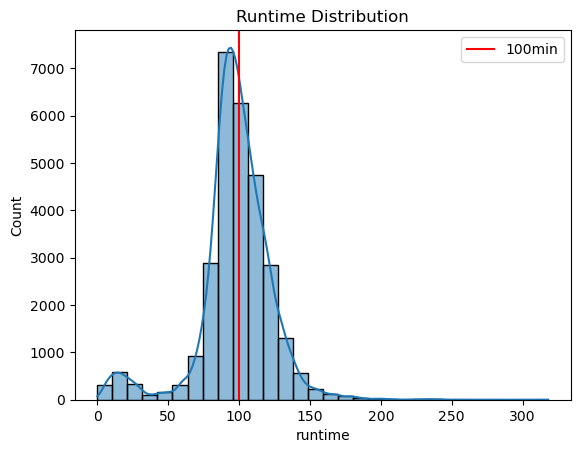

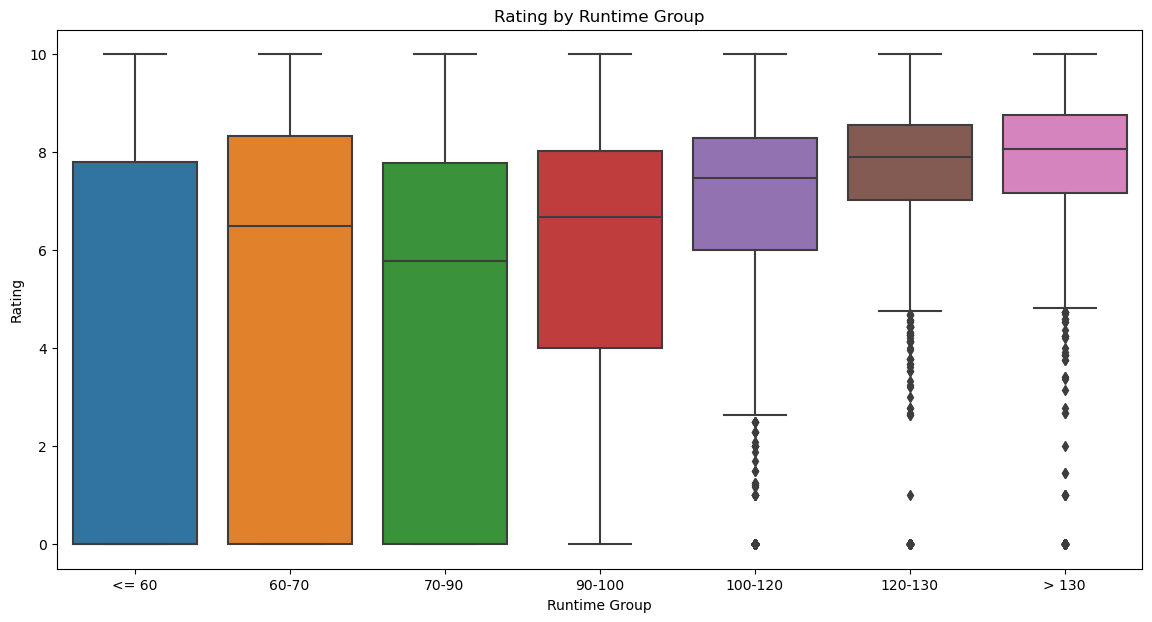

In [2]:
# 상영 시간별 평점 분포
sns.histplot(df['runtime'], bins=30, kde=True)
plt.axvline(x=100, color='red', linestyle='-', label='100min')
plt.legend()
plt.title('Runtime Distribution')
plt.show()

# 상영 시간 구간별 평점 분포
runtime_bins = [0, 60, 70, 90, 100, 120, 130, float('inf')]
runtime_labels = ['<= 60', '60-70', '70-90', '90-100', '100-120', '120-130', '> 130']
df['runtime_group'] = pd.cut(df['runtime'], bins=runtime_bins, labels=runtime_labels)

plt.figure(figsize=(14, 7))
sns.boxplot(x='runtime_group', y='rating', data=df)
plt.title('Rating by Runtime Group')
plt.xlabel('Runtime Group')
plt.ylabel('Rating')
plt.show()

In [3]:
# 필요한 열만 추출
columns_needed = ['rating', 'like', 'runtime']
df_filtered = df[columns_needed]


# 데이터 형식 변환
df_filtered['rating'] = pd.to_numeric(df_filtered['rating'], errors='coerce')
df_filtered['like'] = pd.to_numeric(df_filtered['like'], errors='coerce')
df_filtered['runtime'] = pd.to_numeric(df_filtered['runtime'], errors='coerce')

# 100분을 기준으로 두 그룹으로 나누기
short_movies = df_filtered[df_filtered['runtime'] <= 100]
long_movies = df_filtered[df_filtered['runtime'] > 100]

# 전처리된 데이터 확인
print(short_movies.head())
print(long_movies.head())

   rating  like  runtime
0    6.33     0       89
4   10.00     1       18
5    0.00     1       21
6    8.51    13       82
7    7.94     6       87
    rating  like  runtime
1    10.00    21      148
2     8.89     9      103
3     8.89     4      103
8     7.73    25      109
20    5.41     3      108


C:\Users\user\AppData\Local\Temp\ipykernel_20880\1388336257.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rating'] = pd.to_numeric(df_filtered['rating'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_20880\1388336257.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['like'] = pd.to_numeric(df_filtered['like'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_20880\1388336257.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

NameError: name 'comparison_df' is not defined

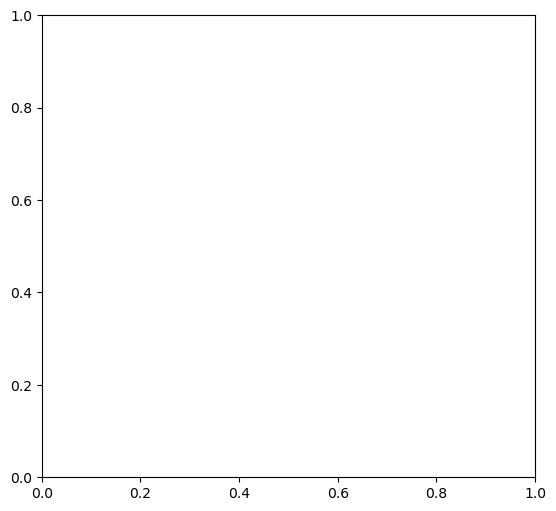

In [4]:
# 시각화 설정
plt.figure(figsize=(14, 6))

# 평균 평점 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='runtime_group', y='avg_rating', data=comparison_df)
plt.title('Average Rating: <= 100 minutes vs > 100 minutes')
plt.xlabel('Runtime Group')
plt.ylabel('Average Rating')

# 총 좋아요 수 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='runtime_group', y='total_likes', data=comparison_df)
plt.title('Total Likes: <= 100 minutes vs > 100 minutes')
plt.xlabel('Runtime Group')
plt.ylabel('Total Likes')

plt.tight_layout()
plt.show()

# 히스토그램 및 박스플롯 시각화
plt.figure(figsize=(14, 6))

# 평점 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['runtime'], bins=30, kde=True)
plt.axvline(x=100, color='red', linestyle='--')
plt.title('Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

# 평점 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x='runtime_group', y='rating', data=df_filtered.assign(runtime_group=lambda x: ['<= 100 minutes' if v <= 100 else '> 100 minutes' for v in x['runtime']]))
plt.title('Rating Distribution by Runtime Group')
plt.xlabel('Runtime Group')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

# t-test 수행
ttest_result_rating = stats.ttest_ind(short_movies['rating'], long_movies['rating'], equal_var=False)
ttest_result_likes = stats.ttest_ind(short_movies['like'], long_movies['like'], equal_var=False)

print('T-test result for ratings:', ttest_result_rating)
print('T-test result for likes:', ttest_result_likes)

# 가설 3 추가 분석: 시간대를 세분화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("INDIA/preprocessed_SeriesOn.csv", encoding = 'utf-8-sig')

# 필요한 열만 추출
columns_needed = ['rating', 'like', 'runtime']
df_filtered = df[columns_needed]


# 데이터 형식 변환
df_filtered['rating'] = pd.to_numeric(df_filtered['rating'], errors='coerce')
df_filtered['like'] = pd.to_numeric(df_filtered['like'], errors='coerce')
df_filtered['runtime'] = pd.to_numeric(df_filtered['runtime'], errors='coerce')

In [5]:
def categorize_runtime(runtime):
    if runtime <= 20:
        return '<= 20 min'
    elif 20 < runtime <= 40:
        return '20-40 min'
    elif 40 < runtime <= 60:
        return '40-60 min'
    elif 60 < runtime <= 80:
        return '60-80 min'
    elif 80 < runtime <= 100:
        return '80-100 min'
    elif 100 < runtime <= 120:
        return '100-120 min'
    elif 120 < runtime <= 140:
        return '120-140 min'
    elif 140 < runtime <= 160:
        return '140-160 min'
    elif 160 < runtime <= 180:
        return '160-180 min'
    else:
        return '> 180 min'

df_filtered['runtime_group'] = df_filtered['runtime'].apply(categorize_runtime)

# 그룹별 데이터 확인
print(df_filtered['runtime_group'].value_counts())

runtime_group
80-100 min     12271
100-120 min     8989
120-140 min     3047
60-80 min       2334
<= 20 min        846
140-160 min      561
20-40 min        476
40-60 min        379
160-180 min      189
> 180 min         93
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_20880\4274757162.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['runtime_group'] = df_filtered['runtime'].apply(categorize_runtime)


In [6]:
# 그룹별 평균 평점 및 총 좋아요 수 계산
grouped_data = df_filtered.groupby('runtime_group').agg({
    'rating': 'mean',
    'like': 'sum'
}).reset_index()

print(grouped_data)

  runtime_group    rating    like
0   100-120 min  6.505382  276538
1   120-140 min  7.323187  162561
2   140-160 min  7.383155   40227
3   160-180 min  7.947513   14914
4     20-40 min  2.776513    3904
5     40-60 min  4.598865    5694
6     60-80 min  4.634507   24192
7    80-100 min  5.269211  160068
8     <= 20 min  2.475083    3209
9     > 180 min  8.245376   10443


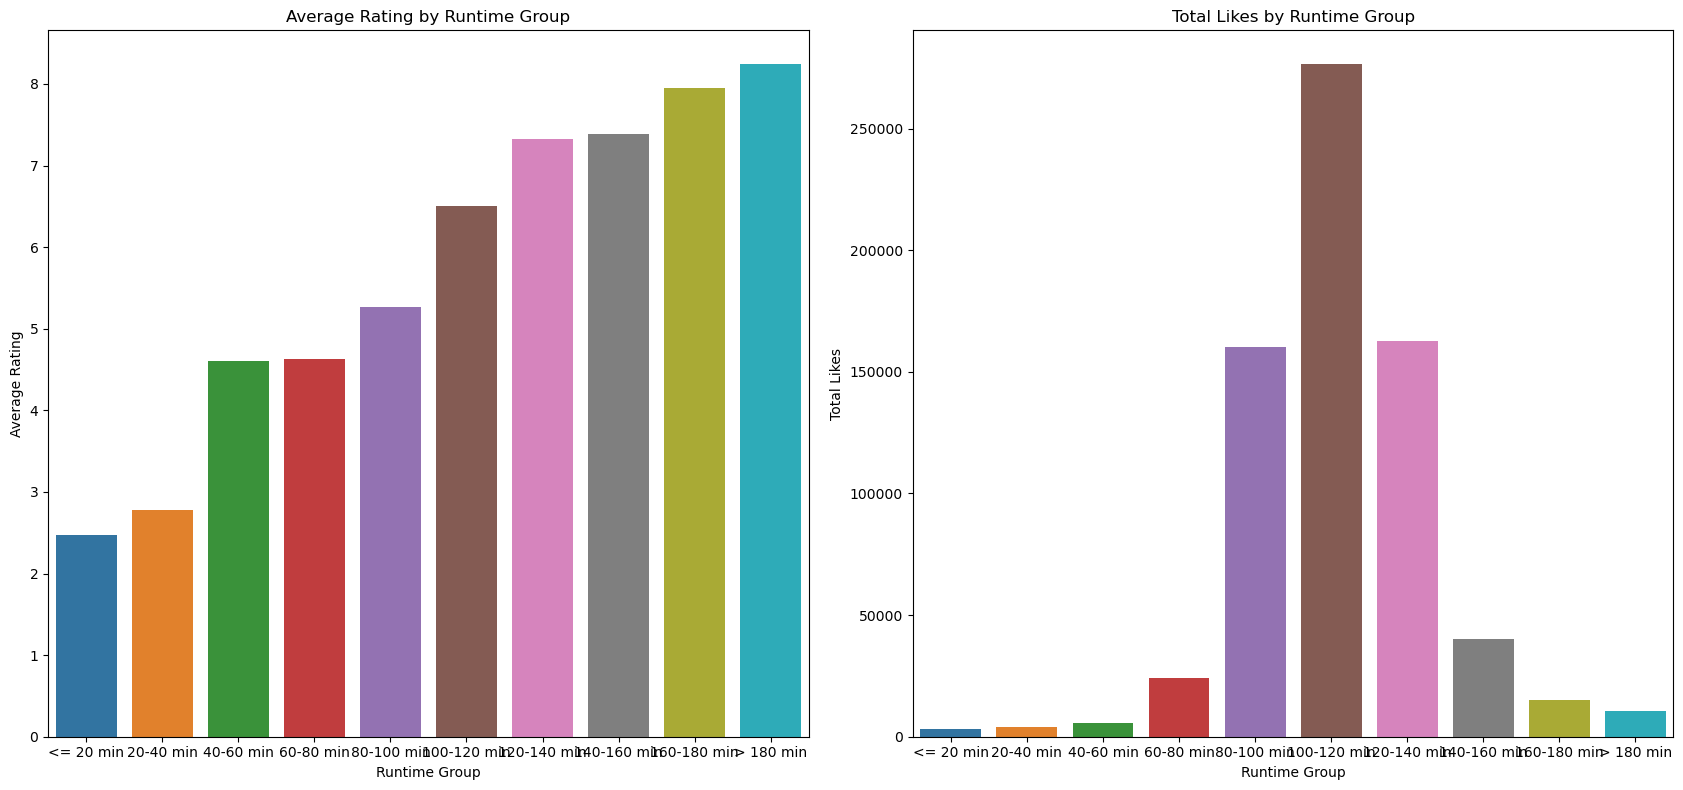

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 그룹화 예시 (평균 평점과 총 좋아요 수를 구하는 코드가 필요함)
grouped_data = df_filtered.groupby('runtime_group').agg({'rating': 'mean', 'like': 'sum'}).reset_index()

plt.figure(figsize=(17, 8))

# 평균 평점 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='runtime_group', y='rating', data=grouped_data, order=['<= 20 min', '20-40 min', '40-60 min', '60-80 min', '80-100 min', '100-120 min', '120-140 min', '140-160 min', '160-180 min', '> 180 min'])
plt.title('Average Rating by Runtime Group')
plt.xlabel('Runtime Group')
plt.ylabel('Average Rating')

# 총 좋아요 수 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='runtime_group', y='like', data=grouped_data, order=['<= 20 min', '20-40 min', '40-60 min', '60-80 min', '80-100 min', '100-120 min', '120-140 min', '140-160 min', '160-180 min', '> 180 min'])
plt.title('Total Likes by Runtime Group')
plt.xlabel('Runtime Group')
plt.ylabel('Total Likes')

plt.tight_layout()
plt.show()